In [2]:
%matplotlib inline
import quandl, math
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [3]:
CME_contracts =['SB','JO','LB','KC','CT','CC','RR','SI','PL','HG','GC','DA','PB','HE',
                'LC','FC','US','TY','TU','MB','FV','ED','YU','SP','RL','ND','MV','KV',
                'DJ','W','SM','S','O','MW','KW','C','BO','ITCO','RB','NG','HU','HO',
                'CL','SF','JY','EU','DX','CD','BP','AD']

In [23]:
df=pd.DataFrame()
for c in CME_contracts:
    ticker='CFTC/'+c+'_F_ALL'
    try:
        d=quandl.get(ticker,authtoken=token)
        x=(d['Producer/Merchant/Processor/User Longs']-d['Producer/Merchant/Processor/User Shorts'])
        df[c]=x/(d['Total Reportable Longs']+d['Total Reportable Shorts'])
    except:
        print c

JO
PB
HE
US
TY
TU
MB
FV
ED
YU
SP
RL
ND
MV
KV
DJ
ITCO
HU
SF
JY
EU
DX
CD
BP
AD


In [24]:
df.head()

,SB,LB,KC,CT,CC,RR,SI,PL,HG,GC,...,S,O,MW,KW,C,BO,RB,NG,HO,CL
Date,,,,,,,,,,,,,,,,,,,,,
2006-06-13,-0.199094,-0.001182,-0.114834,-0.217755,-0.066841,-0.339394,-0.122600,-0.132367,-0.003654,-0.173990,...,-0.093005,-0.366715,-0.153227,-0.325947,-0.225204,-0.296148,-0.213149,-0.008455,-0.176250,-0.045264
2006-06-20,-0.215201,-0.011393,-0.113625,-0.232556,-0.101364,-0.318845,-0.117474,-0.205351,-0.026049,-0.161151,...,-0.085976,-0.364600,-0.147738,-0.306442,-0.201569,-0.239399,-0.192576,-0.008666,-0.179604,-0.055704
2006-06-27,-0.223034,-0.041031,-0.110141,-0.208852,-0.114194,-0.325352,-0.097649,-0.199227,-0.033395,-0.152522,...,-0.049089,-0.416425,-0.213890,-0.318461,-0.184800,-0.257786,-0.191338,-0.008236,-0.194359,-0.047756
2006-07-03,-0.227606,-0.009442,-0.140983,-0.200809,-0.158662,-0.339639,-0.143638,-0.278144,-0.042125,-0.150881,...,-0.091654,-0.429453,-0.213932,-0.333933,-0.192171,-0.285282,-0.179188,-0.005491,-0.201270,-0.049780
2006-07-11,-0.224499,-0.010412,-0.140700,-0.186571,-0.204448,-0.347615,-0.149257,-0.295544,-0.059109,-0.142326,...,-0.117215,-0.444454,-0.199859,-0.331521,-0.202971,-0.304989,-0.187857,-0.004876,-0.193673,-0.045766


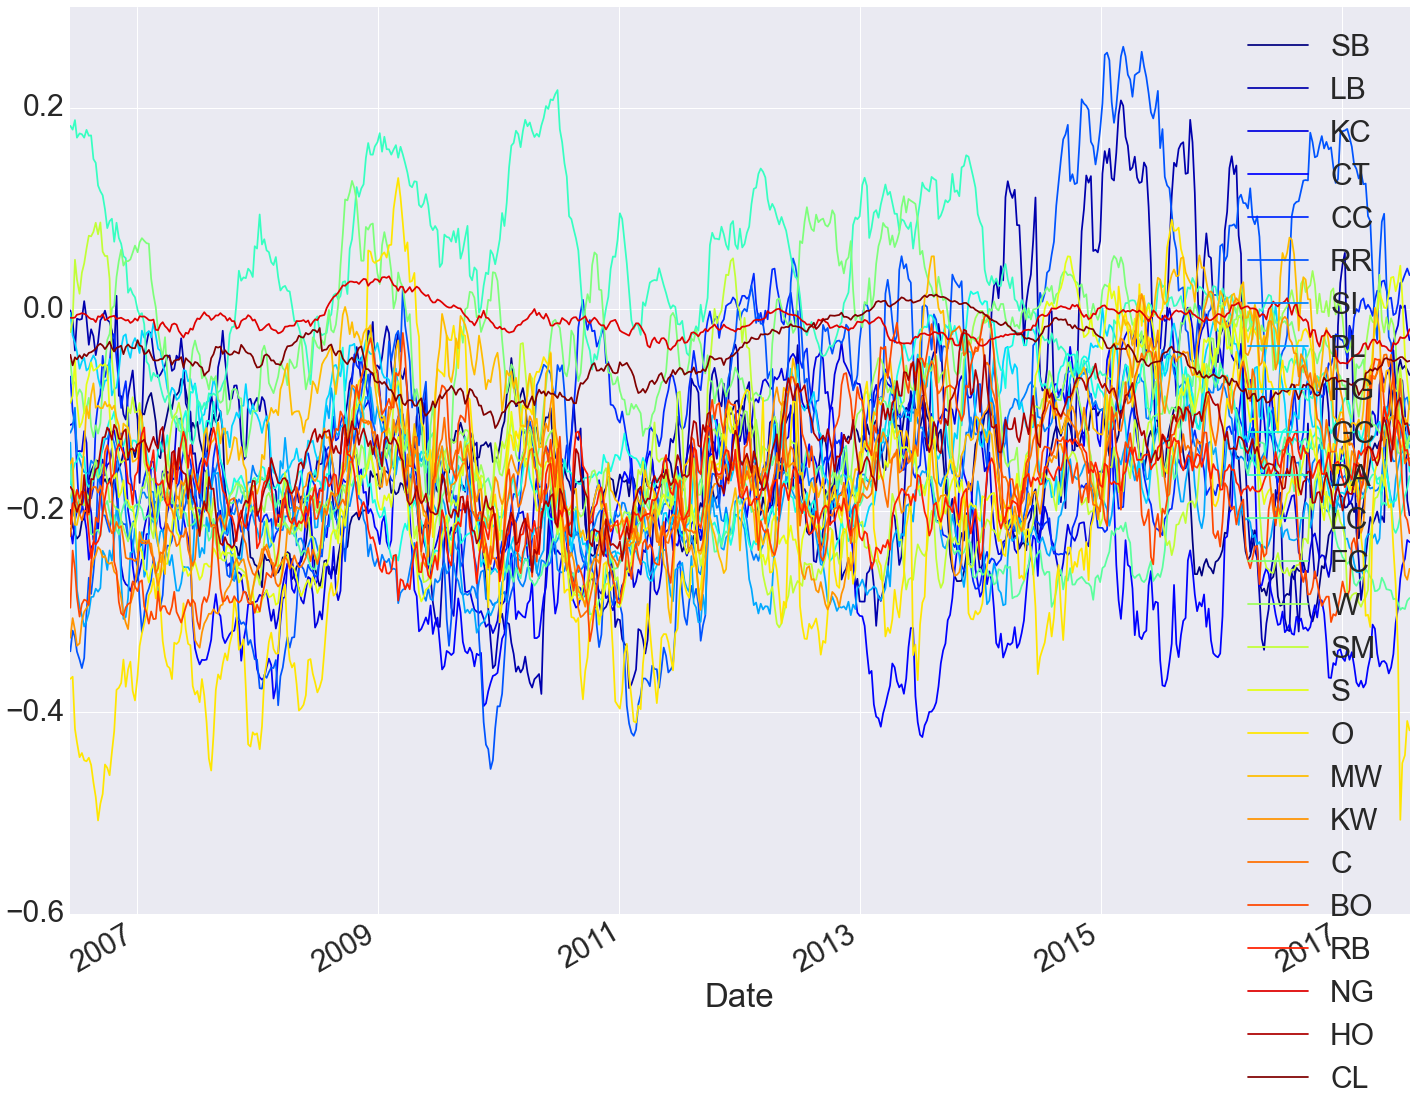

In [25]:
df.plot(colormap='jet')

In [26]:
c='C'
ticker='CFTC/'+c+'_F_ALL'
d=quandl.get(ticker,authtoken=token)

In [27]:
d

,Open Interest,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Swap Dealer Longs,Swap Dealer Shorts,Swap Dealer Spreads,Money Manager Longs,Money Manager Shorts,Money Manager Spreads,Other Reportable Longs,Other Reportable Shorts,Other Reportable Spreads,Total Reportable Longs,Total Reportable Shorts,Non Reportable Longs,Non Reportable Shorts
Date,,,,,,,,,,,,,,,,
2006-06-13,1320155.0,209662.0,699163.0,369306.0,987.0,8015.0,206785.0,43977.0,100938.0,114262.0,49436.0,131054.0,1140022.0,1033570.0,180133.0,286585.0
2006-06-20,1321520.0,224476.0,666688.0,365808.0,6396.0,6929.0,181559.0,63207.0,116365.0,117004.0,48192.0,136968.0,1149109.0,1044745.0,172411.0,276775.0
2006-06-27,1329400.0,234769.0,645735.0,365562.0,14955.0,7488.0,175000.0,86829.0,116399.0,107220.0,41608.0,152194.0,1158632.0,1065208.0,170768.0,264192.0
2006-07-03,1327482.0,220552.0,648405.0,367809.0,10016.0,8367.0,188379.0,100270.0,111608.0,114993.0,41721.0,147161.0,1158869.0,1067548.0,168613.0,259934.0
2006-07-11,1333225.0,216968.0,673110.0,374780.0,1898.0,10024.0,197118.0,70423.0,123139.0,105437.0,49807.0,145728.0,1173194.0,1074129.0,160031.0,259096.0
2006-07-18,1355524.0,214759.0,692443.0,387292.0,132.0,8786.0,204355.0,37435.0,128375.0,86867.0,56827.0,162596.0,1193030.0,1086594.0,162494.0,268930.0
2006-07-25,1393192.0,224659.0,692935.0,381170.0,532.0,8881.0,191108.0,54089.0,131908.0,106806.0,47552.0,181385.0,1225917.0,1117282.0,167275.0,275910.0
2006-08-01,1399222.0,213984.0,684728.0,386537.0,1939.0,5935.0,198921.0,66427.0,134199.0,108755.0,51605.0,178090.0,1226421.0,1122923.0,172801.0,276299.0
2006-08-08,1366163.0,204653.0,670462.0,391300.0,2548.0,5072.0,197286.0,68608.0,129151.0,107713.0,52202.0,160936.0,1196111.0,1088979.0,170052.0,277184.0


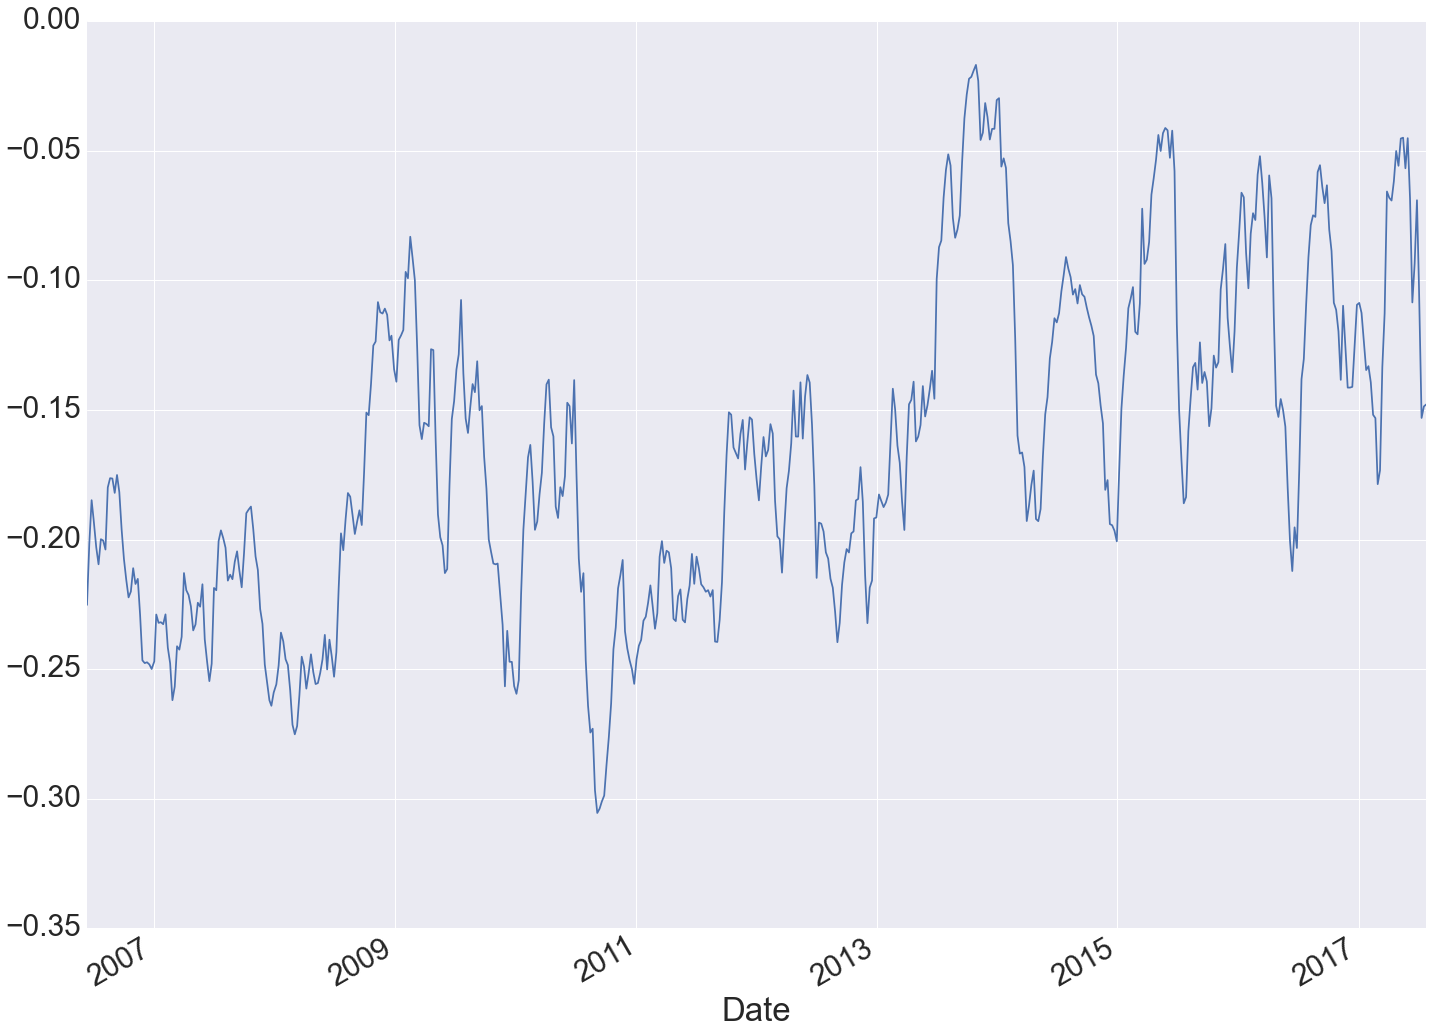

In [34]:
df.C.plot()

In [35]:
cleansed_data.head()

AttributeError: 'function' object has no attribute 'head'